In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data_path='../data/KGHM_clear.csv'

In [4]:
df=pd.read_pickle(data_path)

In [5]:
df.head()

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840,0.0,NaN,0.0,0.0
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035,1.0,0.0,0.0,0.0
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57,1.0,0.0,0.0,0.0
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288,183.0,0.0,0.0,0.0
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9,359.0,-0.1,0.0,0.0


In [5]:
df_part=df.loc[:100,:]

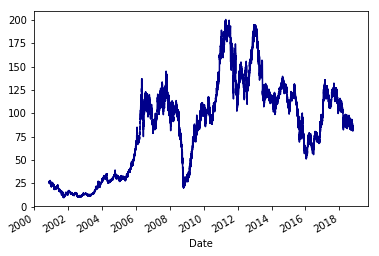

In [6]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

This method is very slow

In [7]:
# import matplotlib.pyplot as plt
# plt.plot(df['Date'], df['Open'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

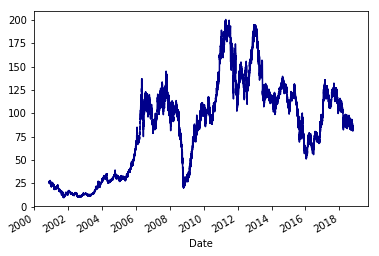

In [8]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

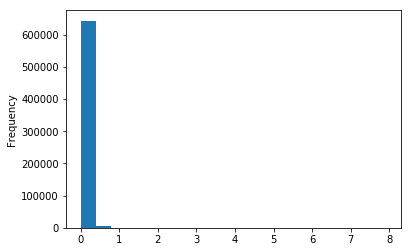

In [53]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)
plt.show()

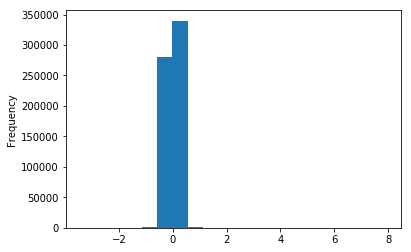

In [54]:
df.OpenCloseDiff[df["OpenCloseDiff"]!=0].plot.hist(bins=20)
plt.show()

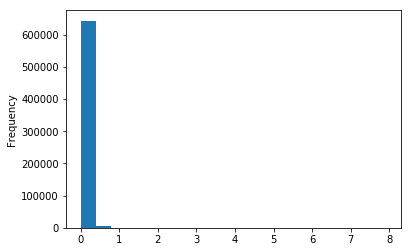

In [55]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)
plt.show()

In [ ]:
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax, bins=100, bottom=0.1)
ax.title()
ax.set_yscale('log')
fig,ax2=plt.subplots()
df.OpenCloseDiff.hist(ax=ax2, bins=100, bottom=0.1)
ax2.set_yscale('log')

In [19]:
df.OpenCloseDiff.sum()

2198.369999999989

In [20]:
df.LowHighDiff.sum()

51128.67000000006

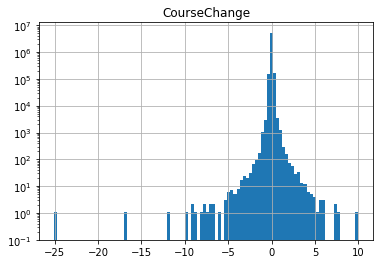

In [79]:
fig, ax = plt.subplots()
df.CoursChange.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('CourseChange')
plt.show()

In [ ]:
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('TimeDelta')
plt.show()

In [22]:
df[["CoursChange","TimeDelta"]].corr()

,CoursChange,TimeDelta
CoursChange,1.000000,0.034598
TimeDelta,0.034598,1.000000


Jak widać, korelacja jest bardzo mała. Modele liniowe mogą działać słabo

/home/filip/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


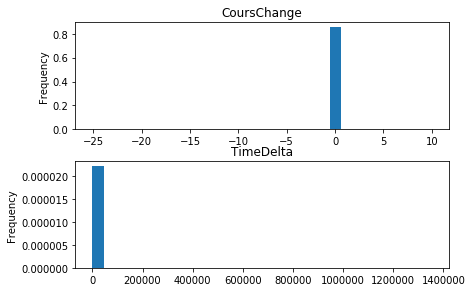

In [23]:
df2=df
df2=df2[["CoursChange","TimeDelta"]]

# This formats the plots such that they appear on separate rows
fig,axes= plt.subplots(2,1)
fig.tight_layout()

# Plot the PDF
df2.CoursChange.plot(ax=axes[0],kind='hist', normed=True, bins=30,title="CoursChange")
# plt.show()
# plt.title("CoursChange")
# plt.subplot(212)
df2.TimeDelta.plot(ax=axes[1],kind='hist', normed=True, bins=20,title="TimeDelta")

# Plot the CDF
# df2.CoursChange.plot(ax=axes[1], kind='hist', normed=True, cumulative=True, bins=30)
plt.show()


Zdecydowana większość zmian czasu i kursu jest bliska zeru

In [80]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

x = df.TimeDelta
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':2500, 'size':1, 'start':0}
    )]

In [81]:
layout = go.Layout(
#     title='Sampled Results',
    yaxis=dict(
        title='Probability'
    ),
    xaxis=dict(
        title='CourseChange'
    ),
    bargap=0.2,
    bargroupgap=0.1
)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='TimeDeltaCDF')

/home/filip/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [100]:
x = df[2000000:df.CoursChange.shape[0]].CoursChange
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':6.015, 'size':0.005, 'start':-4}
    )]

In [101]:
layout = go.Layout(
#     title='Sampled Results',
    yaxis=dict(
        title='Probability'
    ),
    xaxis=dict(
        title='CourseChange'
    ),
    bargap=0.2,
    bargroupgap=0.1
)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='CoursChangeCDF')

/home/filip/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [ ]:
df[df["TimeDelta"]>800000].index

In [ ]:
df.iloc[3371819]

In [ ]:
df.iloc[3371820]

Anomalia pomiędzy 2014-01-31 09:00:01 a  2014-01-15 17:04:08 . Brak danych przez 15 dni

In [ ]:
df[df["OpenCloseDiff"]>4]

In [ ]:
df.loc[4901630:4901750][["Open"]].plot()

Dziwna zmiana ceny, notowania z poprzedniego dnia się urywają, duże różnice pomiędzy low and high

# Proba prognozowania

In [60]:
df=pd.read_pickle(data_path)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

In [62]:
df.head()

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840,0.0,NaN,0.0,0.0
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035,1.0,0.0,0.0,0.0
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57,1.0,0.0,0.0,0.0
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288,183.0,0.0,0.0,0.0
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9,359.0,-0.1,0.0,0.0


In [63]:
df=df[['Close','TimeDelta']]

In [64]:
df.head(15)

,Close,TimeDelta
0,26.3,0.0
1,26.3,1.0
2,26.3,1.0
3,26.3,183.0
4,26.2,359.0
5,26.3,102.0
6,26.3,189.0
7,26.3,10.0
8,26.3,581.0
9,26.3,332.0


In [65]:
df.shape

(5612899, 2)

In [66]:
data_size=5000000

In [67]:
forecast_out=10

In [68]:
df_test=df[data_size-5:data_size+forecast_out]

In [69]:
df=df[:data_size]

In [70]:
df.tail()

,Close,TimeDelta
4999995,121.60,20.0
4999996,121.55,2.0
4999997,121.60,2.0
4999998,121.50,1.0
4999999,121.70,6.0


In [71]:
df_test

,Close,TimeDelta
4999995,121.60,20.0
4999996,121.55,2.0
4999997,121.60,2.0
4999998,121.50,1.0
4999999,121.70,6.0
5000000,121.50,3.0
5000001,121.70,141.0
5000002,121.50,3.0
5000003,121.75,91.0
5000004,121.80,2.0


In [72]:
df['PredictionPrice'] = df[['Close']].shift(-forecast_out)
df['PredictionTime'] = df[['TimeDelta']].shift(-forecast_out)

In [73]:
df.tail(15)

,Close,TimeDelta,PredictionPrice,PredictionTime
4999985,121.80,102.0,121.60,20.0
4999986,121.85,20.0,121.55,2.0
4999987,121.70,2.0,121.60,2.0
4999988,121.70,7.0,121.50,1.0
4999989,121.70,3.0,121.70,6.0
4999990,121.60,1.0,NaN,NaN
4999991,121.60,8.0,NaN,NaN
4999992,121.55,1.0,NaN,NaN
4999993,121.55,7.0,NaN,NaN
4999994,121.50,2.0,NaN,NaN


In [74]:
# X = np.array(df.drop(['PredictionPrice',"PredictionTime"], 1))
X = np.array(df.drop(['PredictionPrice',"PredictionTime","TimeDelta"], 1))


In [75]:
X

array([[ 26.3],
       [ 26.3],
       [ 26.3],
       ...,
       [121.6],
       [121.5],
       [121.7]])

In [76]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X
X.shape

(4999990, 1)

In [77]:
X.shape

(4999990, 1)

In [78]:
X_forecast.shape

(10, 1)

In [79]:
# y = np.array(df[['PredictionPrice',"PredictionTime"]])
y =  np.array(df.drop(['Close',"PredictionTime","TimeDelta"], 1))
y = y[:-forecast_out]

In [80]:
y.shape

(4999990, 1)

In [92]:
X

array([[ 26.3],
       [ 26.3],
       [ 26.3],
       ...,
       [121.7],
       [121.7],
       [121.7]])

In [82]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [93]:
normalized_X = preprocessing.(X)

In [84]:
normalized_y = preprocessing.normalize(y)

In [85]:
print(normalized_y.shape,normalized_X.shape)

(4999990, 1) (4999990, 1)


In [94]:
normalized_X

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [86]:
y.shape

(4999990, 1)

In [87]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_X, normalized_y, test_size = 0.2, shuffle=False)

In [88]:
X_train,y_train

(array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]), array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]))

In [89]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  1.0


In [90]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [388]:
X_forecast

array([[121.6 ,   1.  ],
       [121.6 ,   8.  ],
       [121.55,   1.  ],
       [121.55,   7.  ],
       [121.5 ,   2.  ],
       [121.6 ,  20.  ],
       [121.55,   2.  ],
       [121.6 ,   2.  ],
       [121.5 ,   1.  ],
       [121.7 ,   6.  ]])

In [368]:
df_test

,Close,TimeDelta
4999995,121.60,20.0
4999996,121.55,2.0
4999997,121.60,2.0
4999998,121.50,1.0
4999999,121.70,6.0
5000000,121.50,3.0
5000001,121.70,141.0
5000002,121.50,3.0
5000003,121.75,91.0
5000004,121.80,2.0
